In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.5.1'

In [3]:
idf = pd.read_csv('../../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



In [4]:
df = idf.loc['2011-08-15':'2011-11-30',:]
#df = idf.loc['2011-07-01':'2011-12-30',:]

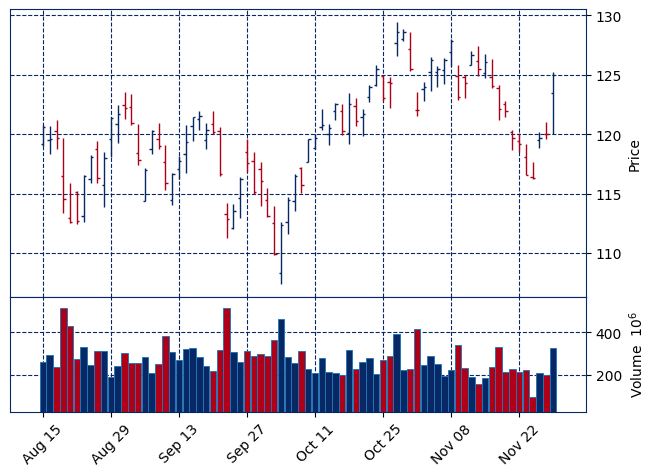

In [5]:
import mplfinance as mpf

mpf.plot(df,volume=True,style='sas')#,adjust_widths=False)

In [6]:
mpf.kwarg_help('plot','ylim')


  ------------------------------------------------------------------------------
  Kwargs for func_name "plot":

  Kwarg Default Description                                                           
  ----  ----    -------------------------------------------------------               
  ylim  None    Limits for y-axis as tuple (min,max), i.e. (bottom,top)               


nstyles,limit,rows= 17 18 9
g_style= ['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


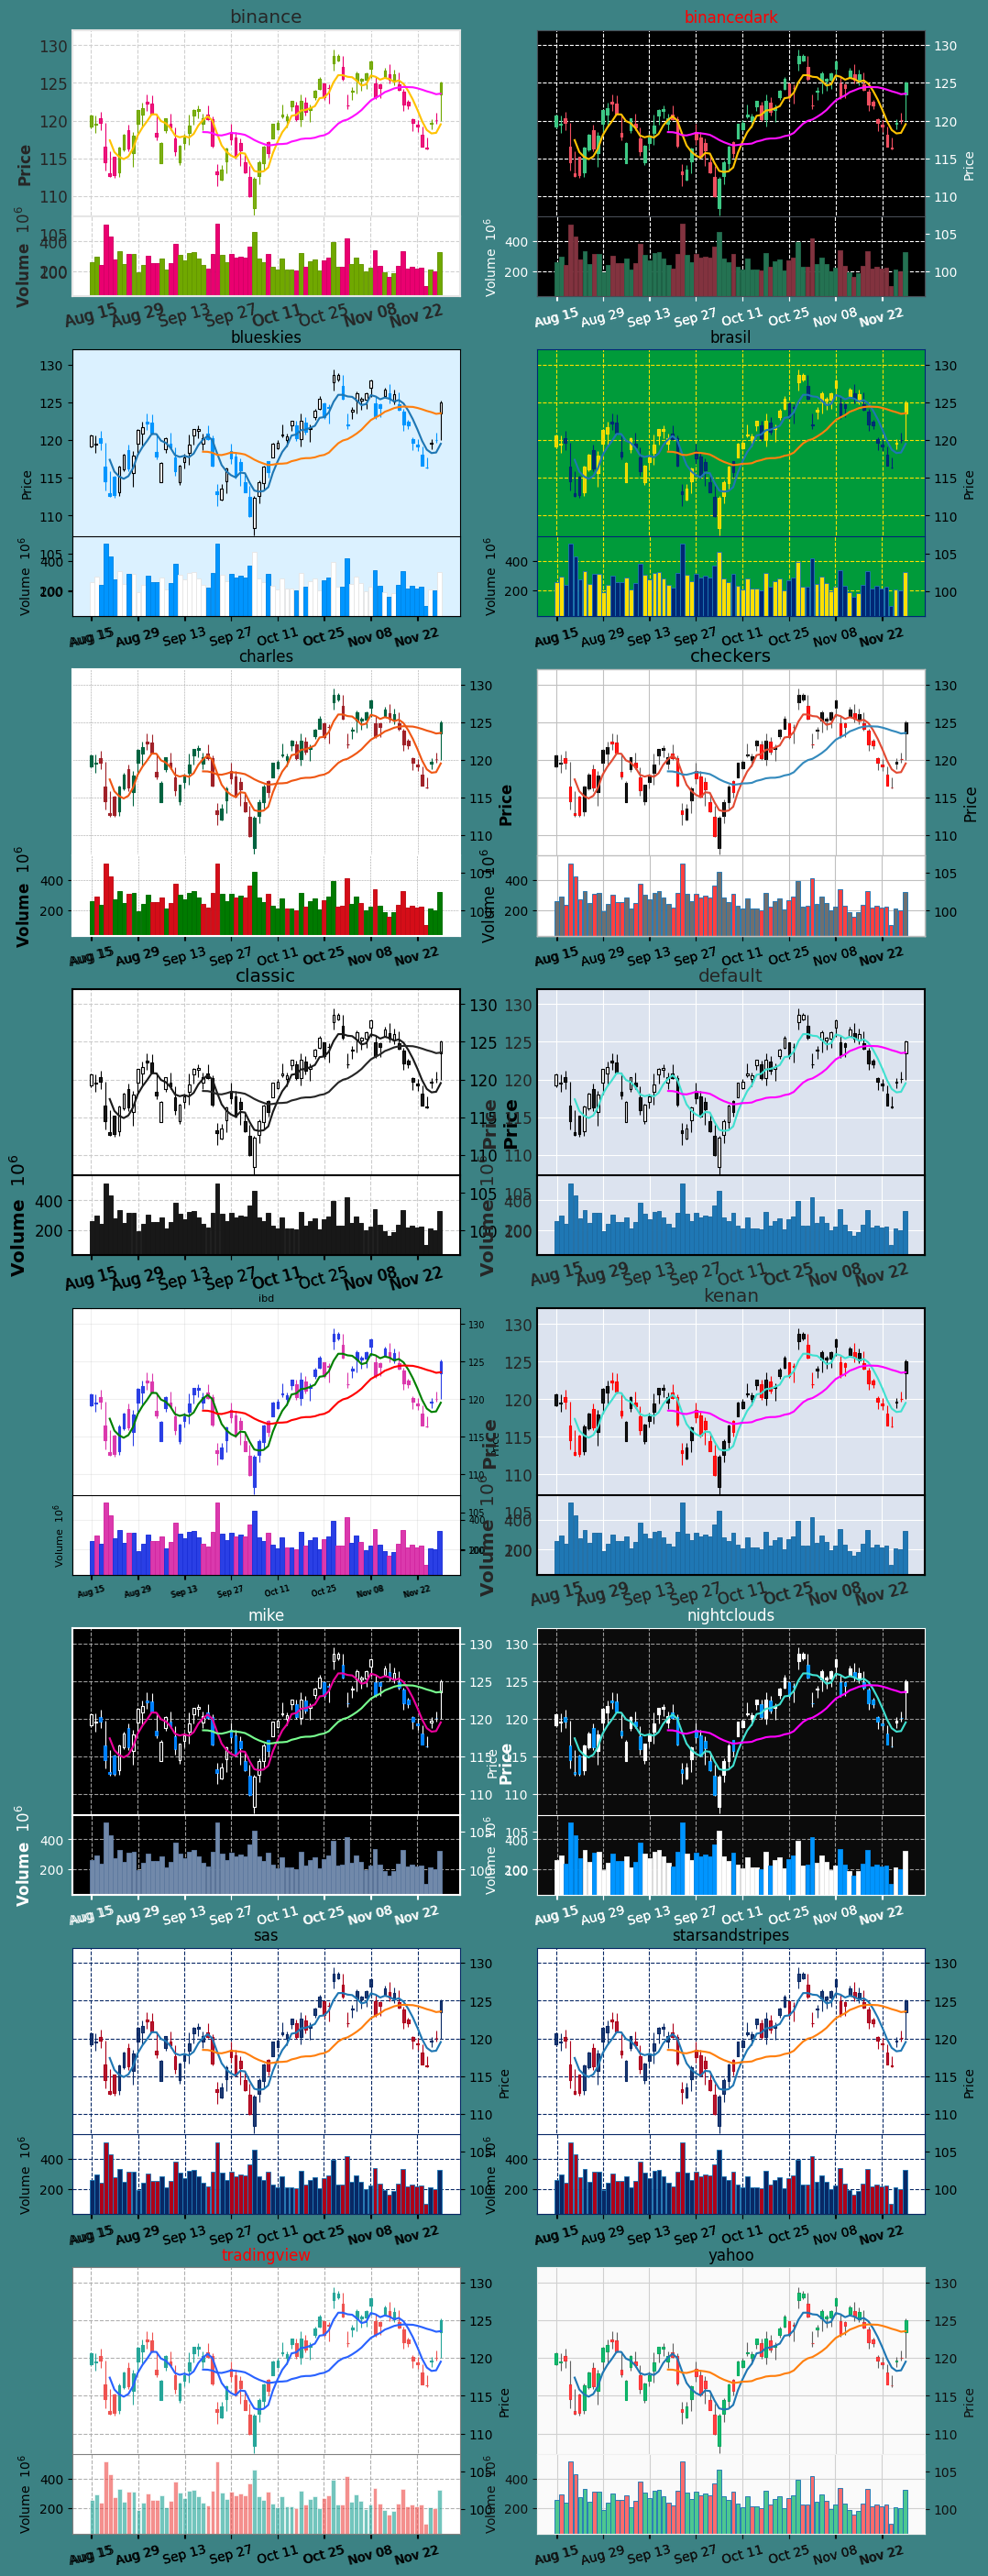

In [7]:
g_style = mpf.available_styles()

nstyles = len(g_style) + 1
limit   = int( nstyles if nstyles%2 == 0 else nstyles + 1 )
rows    = int(limit/2)

print('nstyles,limit,rows=',nstyles,limit,rows)
print('g_style=',g_style)

fig_style = mpf.make_mpf_style(base_mpf_style='default',figcolor='#3C8284')

fig     = mpf.figure(figsize=(12,40),style=fig_style)

for i, style in zip(range(1, limit), g_style):
    ax = fig.add_subplot(rows, 2, i, style=style)
    vx = ax.inset_axes([0,0,1,0.3])
    yhi = max(df.High.values)
    ylo = min(df.Low.values)
    mpf.plot(df, type='candle', mav=(5, 25), axtitle=style, 
             ax=ax, xrotation=15, volume=vx, ylim=(ylo*0.9,1.02*yhi))

mpf.show()

In [8]:
mc = mpf._styles.make_marketcolors(base_mpf_style='tradingview')

In [9]:
mc['vcedge'] #= {'up': '#1f77b4', 'down': '#1f77b3'}
mc['volume']

mc['vcedge'] == mc['volume']
mc

{'up': 'white', 'down': 'white'}

{'up': '#26a69a', 'down': '#ef5350'}

False

{'candle': {'up': '#26a69a', 'down': '#ef5350'},
 'edge': {'up': '#26a69a', 'down': '#ef5350'},
 'wick': {'up': '#26a69a', 'down': '#ef5350'},
 'ohlc': {'up': '#26a69a', 'down': '#ef5350'},
 'volume': {'up': '#26a69a', 'down': '#ef5350'},
 'vcedge': {'up': 'white', 'down': 'white'},
 'vcdopcod': False,
 'alpha': 1.0,
 'volume_alpha': 0.65}

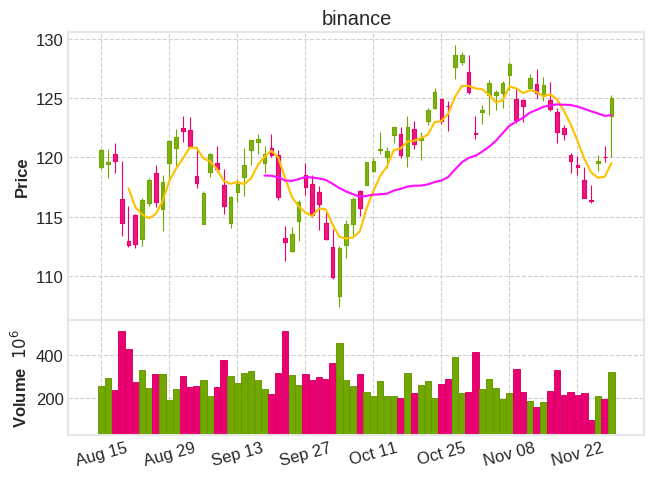

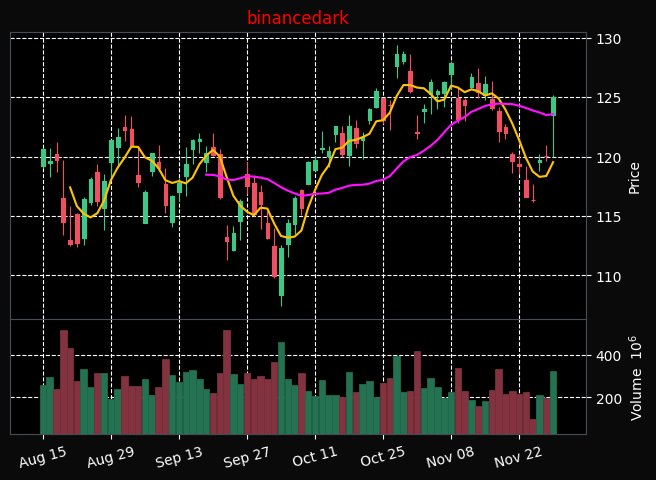

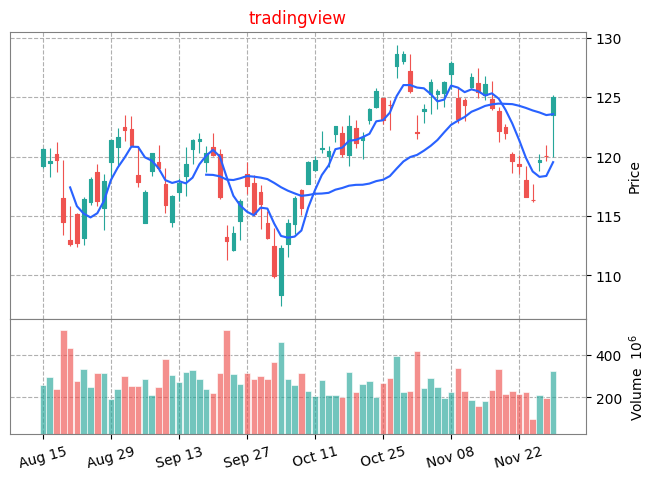

In [10]:
mpf.plot(df, type='candle', mav=(5, 25), axtitle='binance', 
         style='binance', xrotation=15,volume=True)
mpf.plot(df, type='candle', mav=(5, 25), axtitle='binancedark', 
         style='binancedark', xrotation=15,volume=True)
mpf.plot(df, type='candle', mav=(5, 25), axtitle='tradingview', 
         style='tradingview', xrotation=15,volume=True)#,volume_alpha=1)